# Introdução

Nesta análise, exploraremos um conjunto de dados detalhados sobre laptops, incluindo especificações técnicas e seus respectivos preços em euros. O objetivo principal é identificar quais características influenciam o preço final de um laptop, além de fornecer uma visão geral das tendências do mercado de computadores portáteis.

Os dados incluem informações sobre marca, modelo, tamanho da tela, memória RAM, armazenamento, tração e outros componentes essenciais que impactam o desempenho e o valor do produto. Com isso, esta análise buscará responder perguntas como:

 ****1****. Quais marcas oferecem laptops mais acessíveis ou mais caros?

 ****2****. Existe uma correlação significativa entre determinadas especificações (como tamanho da tela ou capacidade da memória RAM) e o preço final?
 
 ****3****. Quais configurações de hardware são mais populares e quais oferecem melhor custo-benefício?

Ao longo da análise, utilizaremos técnicas estatísticas e de visualização de dados para identificar padrões e obter insights sobre o mercado de laptops. Isso permitirá compreender melhor os fatores que influenciam a decisão de compra e como as especificações técnicas se relacionam com o valor percebido pelos consumidores.

In [1]:

import numpy as np
import pandas as pd 



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
import matplotlib.pyplot as plt
import seaborn as sns



plt.style.use('ggplot')

/kaggle/input/laptop-prices/Laptop-Price.csv


In [2]:
laptop = pd.read_csv('/kaggle/input/laptop-prices/Laptop-Price.csv')
laptop

,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,Flash Storage,Hybrid,Gpu Brand,Gpu Model,Unnamed: 16,Price_euros
0,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8GB,No OS,Intel,Core i5 7200U,2.5GHz,256,0,0,0,Intel,HD Graphics 620,NaN,575.00
1,Acer,Aspire 3,Notebook,15.6,1366x768,4GB,Windows 10,AMD,A9-Series 9420,3GHz,0,500,0,0,AMD,Radeon R5,NaN,400.00
2,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,16GB,Windows 10,Intel,Core i7 8550U,1.8GHz,512,0,0,0,Nvidia,GeForce MX150,NaN,1495.00
3,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,8GB,Windows 10,Intel,Core i5 8250U,1.6GHz,256,0,0,0,Intel,UHD Graphics 620,NaN,770.00
4,HP,250 G6,Notebook,15.6,1366x768,4GB,No OS,Intel,Core i5 7200U,2.5GHz,0,500,0,0,Intel,HD Graphics 620,NaN,393.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,Dell,Inspiron 3567,Notebook,15.6,1366x768,8GB,Linux,Intel,Core i7 7500U,2.7GHz,0,1,0,0,AMD,Radeon R5 M430,NaN,805.99
1142,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,4GB,Windows 10,Intel,Core i7 6500U,2.5GHz,0,500,0,0,Nvidia,GeForce 920M,NaN,720.32
1143,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,4GB,Windows 10,Intel,Core i7 6500U,2.5GHz,128,0,0,0,Intel,HD Graphics 520,NaN,638.00
1144,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16GB,Windows 10,Intel,Core i7 6500U,2.5GHz,512,0,0,0,Intel,HD Graphics 520,NaN,1499.00


In [3]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146 entries, 0 to 1145
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1146 non-null   object 
 1   Product           1146 non-null   object 
 2   TypeName          1146 non-null   object 
 3   Inches            1146 non-null   float64
 4   ScreenResolution  1146 non-null   object 
 5   Ram               1146 non-null   object 
 6   OpSys             1146 non-null   object 
 7   Cpu Brand         1146 non-null   object 
 8   Cpu Model         1146 non-null   object 
 9   Cpu Rate          1146 non-null   object 
 10  SSD               1146 non-null   int64  
 11  HDD               1146 non-null   int64  
 12  Flash Storage     1146 non-null   int64  
 13  Hybrid            1146 non-null   int64  
 14  Gpu Brand         1146 non-null   object 
 15  Gpu Model         1146 non-null   object 
 16  Unnamed: 16       0 non-null      float64


a coluna "Unnamed: 16" séra removida por não haver nenhum valor

In [4]:
laptop = laptop.drop(columns = ['Unnamed: 16'])
laptop

,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,Flash Storage,Hybrid,Gpu Brand,Gpu Model,Price_euros
0,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8GB,No OS,Intel,Core i5 7200U,2.5GHz,256,0,0,0,Intel,HD Graphics 620,575.00
1,Acer,Aspire 3,Notebook,15.6,1366x768,4GB,Windows 10,AMD,A9-Series 9420,3GHz,0,500,0,0,AMD,Radeon R5,400.00
2,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,16GB,Windows 10,Intel,Core i7 8550U,1.8GHz,512,0,0,0,Nvidia,GeForce MX150,1495.00
3,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,8GB,Windows 10,Intel,Core i5 8250U,1.6GHz,256,0,0,0,Intel,UHD Graphics 620,770.00
4,HP,250 G6,Notebook,15.6,1366x768,4GB,No OS,Intel,Core i5 7200U,2.5GHz,0,500,0,0,Intel,HD Graphics 620,393.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,Dell,Inspiron 3567,Notebook,15.6,1366x768,8GB,Linux,Intel,Core i7 7500U,2.7GHz,0,1,0,0,AMD,Radeon R5 M430,805.99
1142,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,4GB,Windows 10,Intel,Core i7 6500U,2.5GHz,0,500,0,0,Nvidia,GeForce 920M,720.32
1143,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,4GB,Windows 10,Intel,Core i7 6500U,2.5GHz,128,0,0,0,Intel,HD Graphics 520,638.00
1144,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16GB,Windows 10,Intel,Core i7 6500U,2.5GHz,512,0,0,0,Intel,HD Graphics 520,1499.00


> # 1.   Quais marcas oferecem laptops mais acessíveis ou mais caros?

Analisando a média de preços de cada empresa.

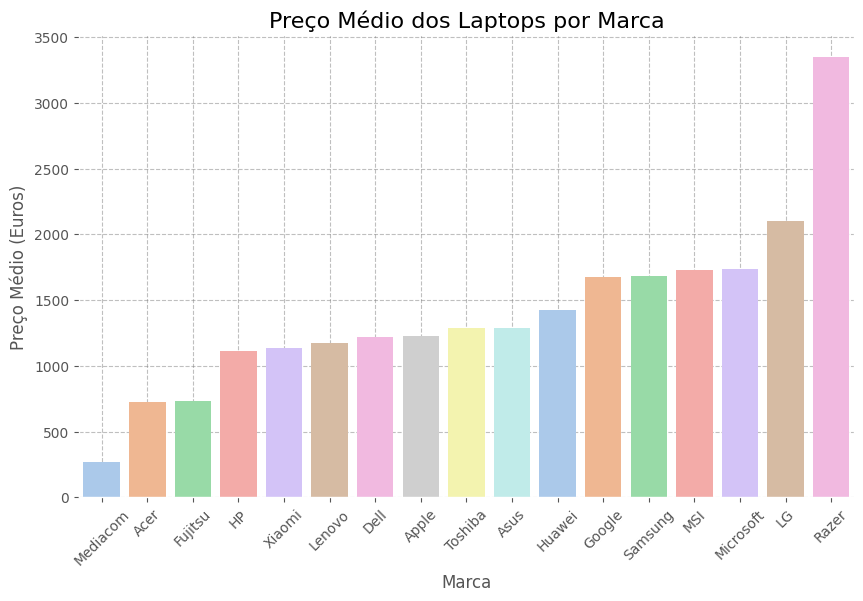

In [5]:
preco_medio_por_marca = laptop.groupby('Company')['Price_euros'].mean().sort_values()
plt.figure(figsize=(10,6))
sns.barplot(x=preco_medio_por_marca.index, y=preco_medio_por_marca.values, palette="pastel")
plt.title('Preço Médio dos Laptops por Marca', fontsize=16)
plt.xlabel('Marca')
plt.ylabel('Preço Médio (Euros)')
plt.xticks(rotation=45)
plt.grid(True, which='both', axis='both', linestyle='--', color='grey', alpha=0.5)
ax = plt.gca()  
ax.set_facecolor('white')
plt.show()

In [6]:
preco_medio_por_marca

Company
Mediacom      265.000000
Acer          728.122078
Fujitsu       729.000000
HP           1112.835000
Xiaomi       1133.462500
Lenovo       1169.672659
Dell         1218.996866
Apple        1226.750000
Toshiba      1284.170213
Asus         1286.529683
Huawei       1424.000000
Google       1677.666667
Samsung      1684.714286
MSI          1728.908148
Microsoft    1736.970000
LG           2099.000000
Razer        3346.142857
Name: Price_euros, dtype: float64

A empresa com a média de preços mais acessível é a Mediacom, enquanto a Razer é a mais cara.

Análisando o valor dos laptops mais acessiveis das empresas.

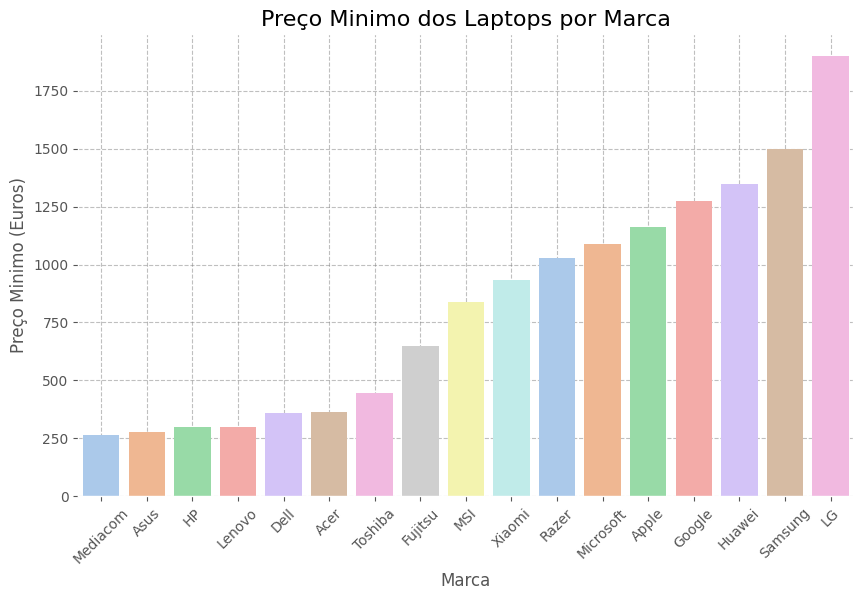

In [7]:

preco_minimo_por_marca = laptop.groupby('Company')['Price_euros'].min().sort_values()
plt.figure(figsize=(10,6))
sns.barplot(x=preco_minimo_por_marca.index, y=preco_minimo_por_marca.values, palette="pastel")
plt.title('Preço Minimo dos Laptops por Marca', fontsize=16)
plt.xlabel('Marca')
plt.ylabel('Preço Minimo (Euros)')
plt.xticks(rotation=45)

plt.grid(True, which='both', axis='both', linestyle='--', color='grey', alpha=0.5)
ax = plt.gca()  
ax.set_facecolor('white')
plt.show()

In [8]:
preco_minimo_por_marca

Company
Mediacom      265.00
Asus          277.99
HP            297.00
Lenovo        298.00
Dell          359.00
Acer          361.80
Toshiba       447.00
Fujitsu       649.00
MSI           839.00
Xiaomi        935.00
Razer        1029.00
Microsoft    1089.00
Apple        1163.00
Google       1275.00
Huawei       1349.00
Samsung      1499.00
LG           1899.00
Name: Price_euros, dtype: float64

A Mediacom tem um laptop com o mesmo valor que a sua média de produtos, o que indica que provavelmente há apenas um produto em seu banco de dados. Entre os menores preços de cada empresa, a LG se destaca por ter o menor valor mais caro.


Analisando os maiores preços das empresas.

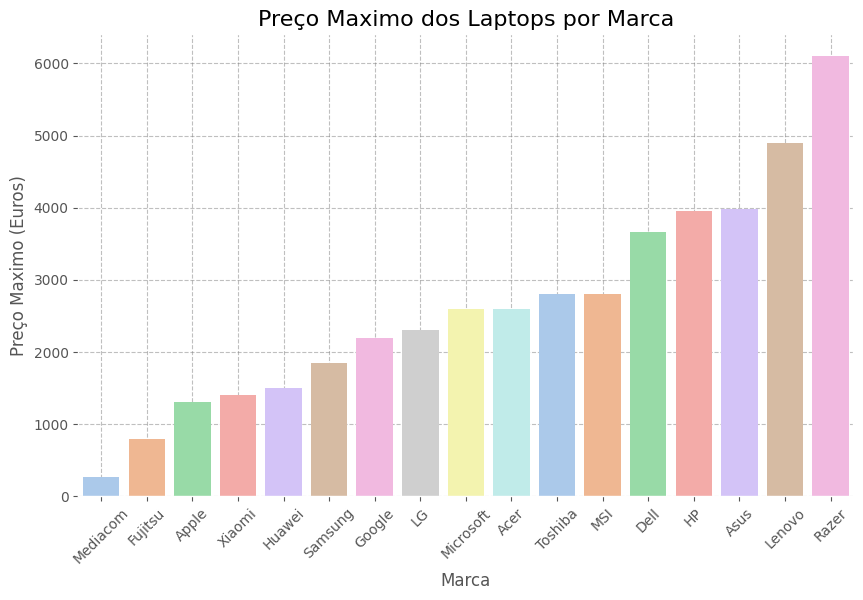

In [9]:
preco_maximo_por_marca = laptop.groupby('Company')['Price_euros'].max().sort_values()
plt.figure(figsize=(10,6))
sns.barplot(x=preco_maximo_por_marca.index, y=preco_maximo_por_marca.values, palette="pastel")
plt.title('Preço Maximo dos Laptops por Marca', fontsize=16)
plt.xlabel('Marca')
plt.ylabel('Preço Maximo (Euros)')
plt.xticks(rotation=45)

plt.grid(True, which='both', axis='both', linestyle='--', color='grey', alpha=0.5)
ax = plt.gca()  
ax.set_facecolor('white')
plt.show()

In [10]:
preco_maximo_por_marca

Company
Mediacom      265.00
Fujitsu       799.00
Apple        1300.00
Xiaomi       1399.95
Huawei       1499.00
Samsung      1849.00
Google       2199.00
LG           2299.00
Microsoft    2589.00
Acer         2599.00
Toshiba      2799.00
MSI          2799.00
Dell         3659.40
HP           3949.40
Asus         3975.00
Lenovo       4899.00
Razer        6099.00
Name: Price_euros, dtype: float64

a empresa com o laptop mais caro é  a Razer

In [11]:
laptop['Company'].value_counts()

Company
Dell         284
Lenovo       267
HP           252
Asus         126
Acer          77
MSI           54
Toshiba       47
Razer          7
Samsung        7
Microsoft      5
Apple          4
Xiaomi         4
Google         3
Fujitsu        3
LG             3
Huawei         2
Mediacom       1
Name: count, dtype: int64

Como mencionado anteriormente, a Mediacom possui apenas um laptop disponível. Portanto, para realizar uma análise mais consistente, irei selecionar apenas as empresas que têm mais de 100 laptops. 

In [12]:
company_count = laptop['Company'].value_counts()
company_validas = company_count[company_count>100].index
laptop_filtrado = laptop[laptop['Company'].isin(company_validas)]
laptop_filtrado['Company'].value_counts()


Company
Dell      284
Lenovo    267
HP        252
Asus      126
Name: count, dtype: int64

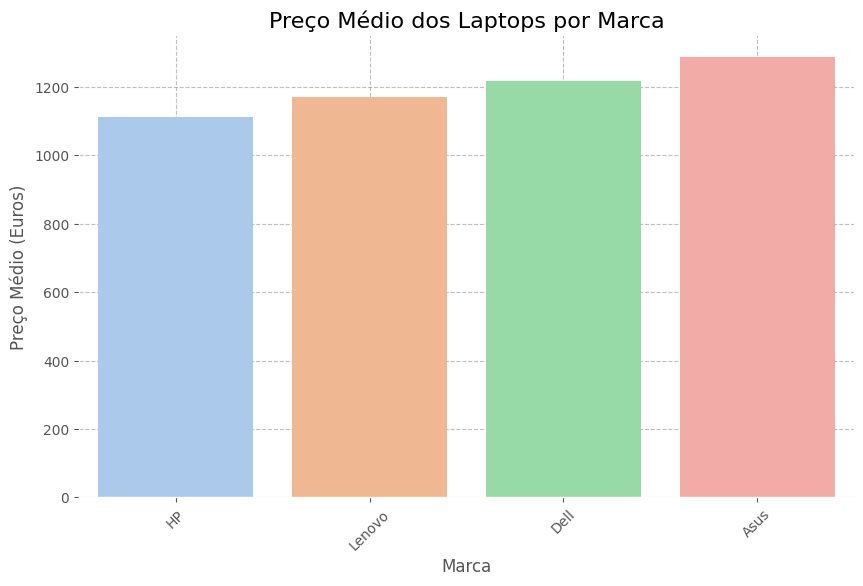

In [13]:

preco_medio_por_marca_filtrado = laptop_filtrado.groupby('Company')['Price_euros'].mean().sort_values()
plt.figure(figsize=(10,6))
sns.barplot(x=preco_medio_por_marca_filtrado.index, y=preco_medio_por_marca_filtrado.values, palette="pastel")
plt.title('Preço Médio dos Laptops por Marca', fontsize=16)
plt.xlabel('Marca')
plt.ylabel('Preço Médio (Euros)')
plt.xticks(rotation=45)

plt.grid(True, which='both', axis='both', linestyle='--', color='grey', alpha=0.5)
ax = plt.gca()  
ax.set_facecolor('white')
plt.show()

In [14]:
preco_medio_por_marca_filtrado

Company
HP        1112.835000
Lenovo    1169.672659
Dell      1218.996866
Asus      1286.529683
Name: Price_euros, dtype: float64

agora com o valores filtrados, a empresa com a menor média é a HP e a maior é a Asus.

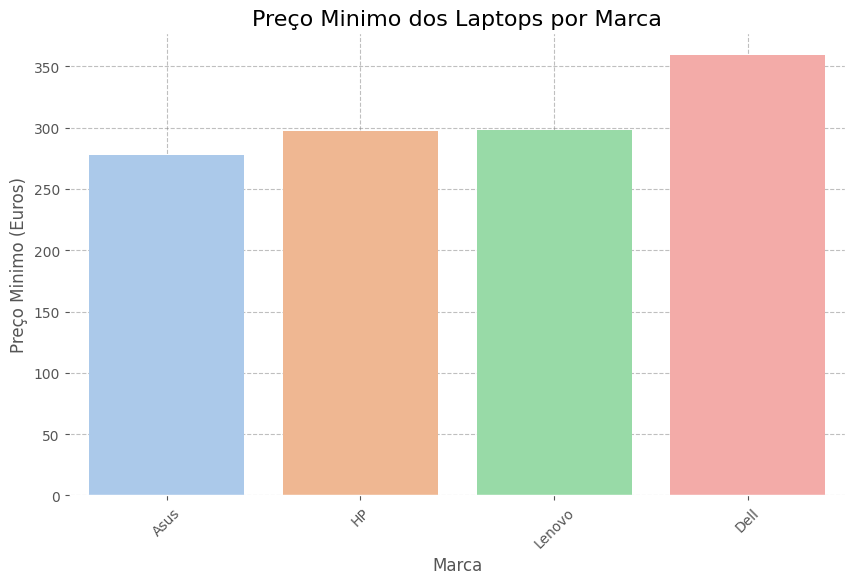

In [15]:
preco_minimo_por_marca_filtrado = laptop_filtrado.groupby('Company')['Price_euros'].min().sort_values()
plt.figure(figsize=(10,6))
sns.barplot(x=preco_minimo_por_marca_filtrado.index, y=preco_minimo_por_marca_filtrado.values, palette="pastel")
plt.title('Preço Minimo dos Laptops por Marca', fontsize=16)
plt.xlabel('Marca')
plt.ylabel('Preço Minimo (Euros)')
plt.xticks(rotation=45)

plt.grid(True, which='both', axis='both', linestyle='--', color='grey', alpha=0.5)
ax = plt.gca()  
ax.set_facecolor('white')
plt.show()

In [16]:
preco_minimo_por_marca_filtrado

Company
Asus      277.99
HP        297.00
Lenovo    298.00
Dell      359.00
Name: Price_euros, dtype: float64

Apesar de a Asus ter a maior média de preços, é ela que possui o laptop com o menor valor.

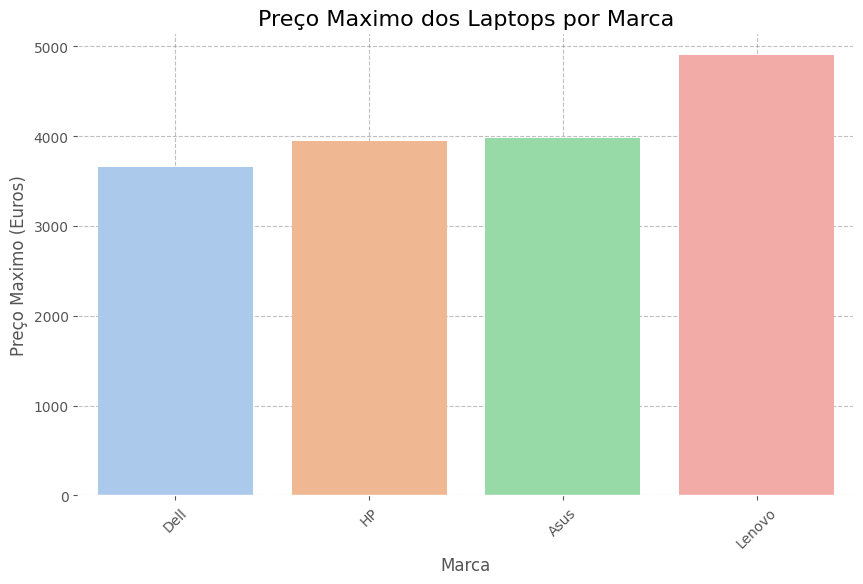

In [17]:
preco_maximo_por_marca_filtrado = laptop_filtrado.groupby('Company')['Price_euros'].max().sort_values()
plt.figure(figsize=(10,6))
sns.barplot(x=preco_maximo_por_marca_filtrado.index, y=preco_maximo_por_marca_filtrado.values, palette="pastel")
plt.title('Preço Maximo dos Laptops por Marca', fontsize=16)
plt.xlabel('Marca')
plt.ylabel('Preço Maximo (Euros)')
plt.xticks(rotation=45)

plt.grid(True, which='both', axis='both', linestyle='--', color='grey', alpha=0.5)
ax = plt.gca()  
ax.set_facecolor('white')
plt.show()

In [18]:
preco_maximo_por_marca_filtrado

Company
Dell      3659.4
HP        3949.4
Asus      3975.0
Lenovo    4899.0
Name: Price_euros, dtype: float64

O produto mais caro da Lenovo tem uma diferença de quase 1000 euros em relação ao produto mais caro da Asus.

* **Nesta breve análise, conclui-se que, de todas as empresas, a mais acessível é a Mediacom, porém ela possui apenas um laptop disponível. Por outro lado, a Razer é a marca mais cara, com sete laptops no mercado. No entanto, ao considerar apenas as empresas com mais de 100 laptops, a empresa com a média de preços mais acessível é a HP, enquanto a Asus tem a média de preços mais alta.**

> # 2. Existe uma correlação significativa entre determinadas especificações (como tamanho da tela ou capacidade da memória RAM) e o preço final?

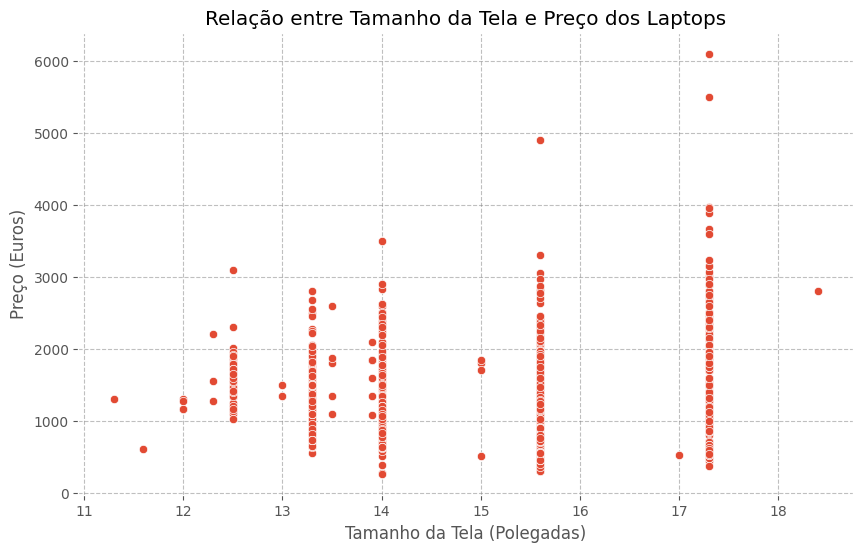

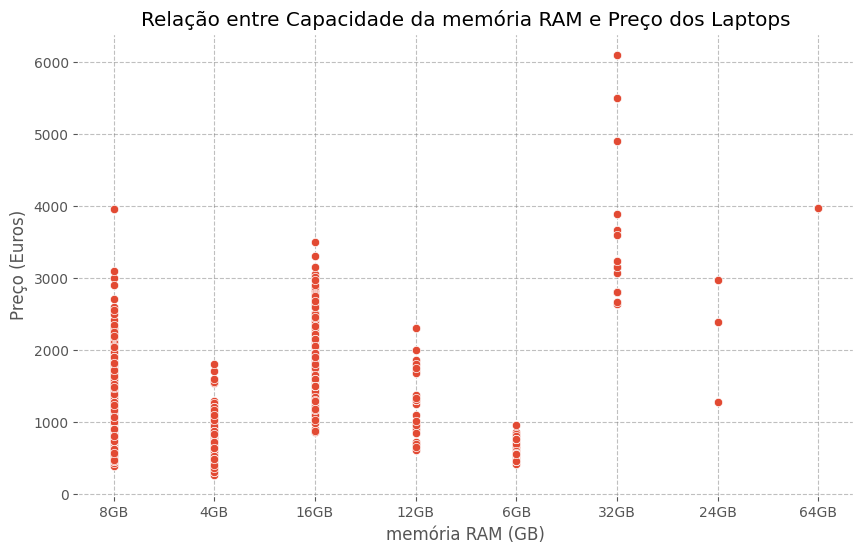

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Inches', y='Price_euros', data=laptop)
plt.title('Relação entre Tamanho da Tela e Preço dos Laptops')
plt.xlabel('Tamanho da Tela (Polegadas)')
plt.ylabel('Preço (Euros)')
plt.grid(True, which='both', axis='both', linestyle='--', color='grey', alpha=0.5)
ax = plt.gca()  
ax.set_facecolor('white')
plt.show()


plt.figure(figsize=(10,6))
sns.scatterplot(x='Ram', y='Price_euros', data=laptop)
plt.title('Relação entre Capacidade da memória RAM e Preço dos Laptops')
plt.xlabel('memória RAM (GB)')
plt.ylabel('Preço (Euros)')
plt.grid(True, which='both', axis='both', linestyle='--', color='grey', alpha=0.5)
ax = plt.gca()  
ax.set_facecolor('white')
plt.show()

In [20]:
laptop.groupby('Inches')['Price_euros'].mean().sort_values()

Inches
17.0     520.900000
11.6     603.000000
15.6     957.890959
12.0    1226.750000
11.3    1299.000000
13.3    1358.194161
14.0    1366.373293
13.0    1424.000000
15.0    1464.000000
12.5    1607.558684
13.9    1637.333333
12.3    1677.666667
17.3    1680.803333
13.5    1736.970000
18.4    2799.000000
Name: Price_euros, dtype: float64

laptops com tela 18.4 são mais caros. 

In [21]:
laptop.groupby('Ram')['Price_euros'].mean().sort_values()

Ram
6GB      619.361500
4GB      656.638195
8GB     1183.392550
12GB    1239.438400
16GB    1912.768410
24GB    2206.333333
32GB    3546.466250
64GB    3975.000000
Name: Price_euros, dtype: float64

* ****Os preços dos laptops apresentam uma relação relativamente linear, em que o aumento da memória RAM tende a elevar o valor do equipamento. No entanto, há uma exceção notável: laptops com 6GB de RAM chegam a ser mais baratos que aqueles com 4GB, quebrando essa tendência.****

> # 3. Quais configurações de hardware são mais populares e quais oferecem melhor custo-benefício?


In [22]:
laptop.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Ram',
       'OpSys', 'Cpu Brand', 'Cpu Model', 'Cpu Rate', 'SSD', 'HDD',
       'Flash Storage', 'Hybrid', 'Gpu Brand', 'Gpu Model', 'Price_euros'],
      dtype='object')

In [23]:
mais_usados = laptop[['Ram','Cpu Brand', 'Cpu Model', 'Gpu Brand', 'Gpu Model']].describe()
mais_usados

,Ram,Cpu Brand,Cpu Model,Gpu Brand,Gpu Model
count,1146,1146,1146,1146,1146
unique,8,2,65,3,96
top,8GB,Intel,Core i5 7200U,Intel,HD Graphics 620
freq,600,1088,193,578,281


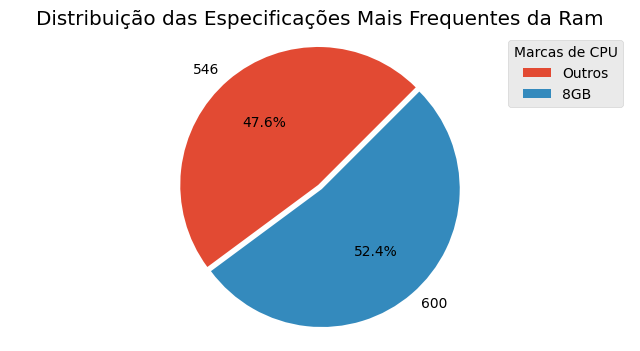

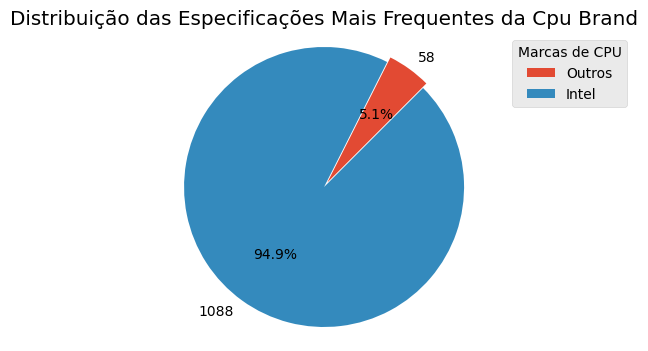

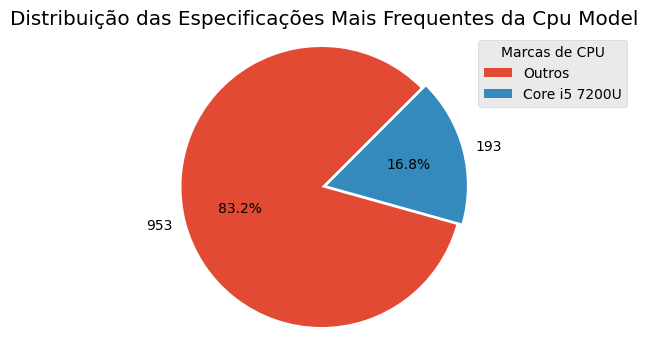

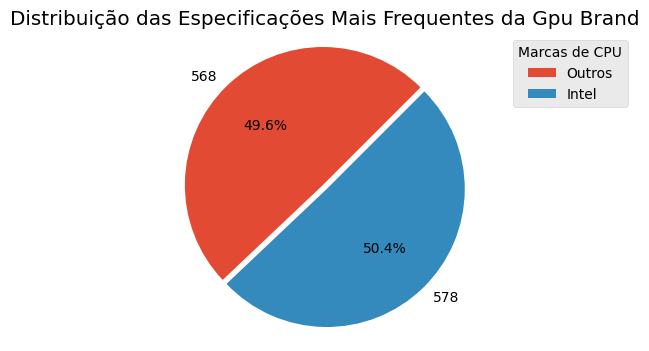

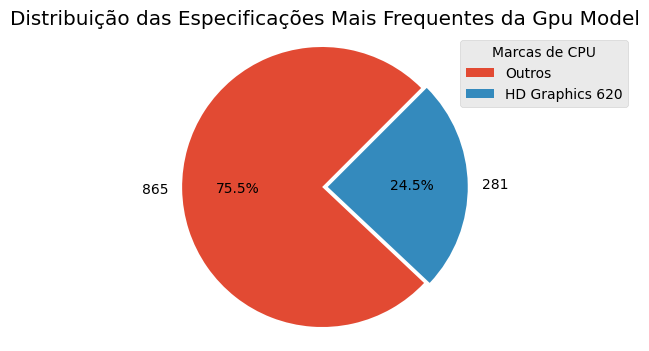

In [24]:
for coluna in mais_usados:
    sizes= [mais_usados[coluna]['count']-mais_usados[coluna]['freq'],mais_usados[coluna]['freq']]
    labels = ['Outros',mais_usados[coluna]['top']]
    explode = (0,0.04)
    plt.figure(figsize=(8,4))
    plt.pie(sizes,explode=explode, labels=sizes, autopct='%1.1f%%', startangle=45)

    plt.legend(labels, title="Marcas de CPU")
    plt.axis('equal')
    
    
    plt.title(f'Distribuição das Especificações Mais Frequentes da {coluna}')
    plt.show()

Os hardwares mais populares são :
* Ram(****8GB****)
* Cpu Brand(****intel****)
* Cpu Model(****Core i5 7200U****)
* Gpu Brand(****intel****)
* Gpu Model(****HD Graphics 620****)

In [25]:
laptop.sort_values('Price_euros').head()

,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,Flash Storage,Hybrid,Gpu Brand,Gpu Model,Price_euros
629,Mediacom,Smartbook 142,Notebook,14.0,IPS Panel Full HD 1920x1200,4GB,Windows 10,Intel,Atom Z8350,1.92GHz,0,32,0,0,Intel,HD Graphics 400,265.00
102,Asus,E402WA-GA007T (E2-6110/4GB/64GB/W10,Notebook,14.0,1366x768,4GB,Windows 10 S,AMD,E-Series 6110,1.5GHz,64,0,0,0,AMD,Radeon R2,277.99
1020,HP,15-BA015wm (E2-7110/4GB/500GB/W10),Notebook,15.6,1366x768,4GB,Windows 10,AMD,E-Series 7110,1.8GHz,0,500,0,0,AMD,Radeon R2 Graphics,297.00
628,Lenovo,110-15ACL (A6-7310/4GB/500GB/W10),Notebook,15.6,1366x768,4GB,Windows 10,AMD,A6-Series 7310,2GHz,0,500,0,0,AMD,Radeon R4,298.00
1071,Lenovo,IdeaPad 320-15AST,Notebook,15.6,1366x768,4GB,Windows 10,AMD,E-Series 9000,2.2GHz,0,500,0,0,AMD,Radeon R2 Graphics,299.00


Os 5  hardwares que oferecem melhor custo-benefício:

* Ram(****4GB****)
* Cpu Brand(****intel,AMD****)
* Cpu Model(****Atom Z8350,E-Series 6110,E-Series 7110,A6-Series 7310,E-Series 9000****)
* Gpu Brand(****intel,AMD****)
* Gpu Model(****HD Graphics 400,Radeon R2,Radeon R2 Graphics,Radeon R4****)